In [1]:
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
real = pd.read_pickle('../data_t-drive/t-drive_cut.pkl')
fake = pd.read_pickle('../data_berlinmod/trips_tdrive.pkl')

In [3]:
fake.head()

trip   longitude   latitude
user time                                                
1    2008-02-01 00:00:00.000     1  116.218823  40.026573
     2008-02-03 10:16:18.338     2  116.218823  40.026573
     2008-02-03 10:16:28.901     2  116.219891  40.026684
     2008-02-03 10:16:29.314     2  116.219891  40.026684
     2008-02-03 10:16:58.246     2  116.220510  40.024168

In [3]:
# Load the OSMNX graphs
streets_beijing = ox.load_graphml('beijing_streets_all.graphml', folder='../osmnx_data')

## Simple overview (small map)

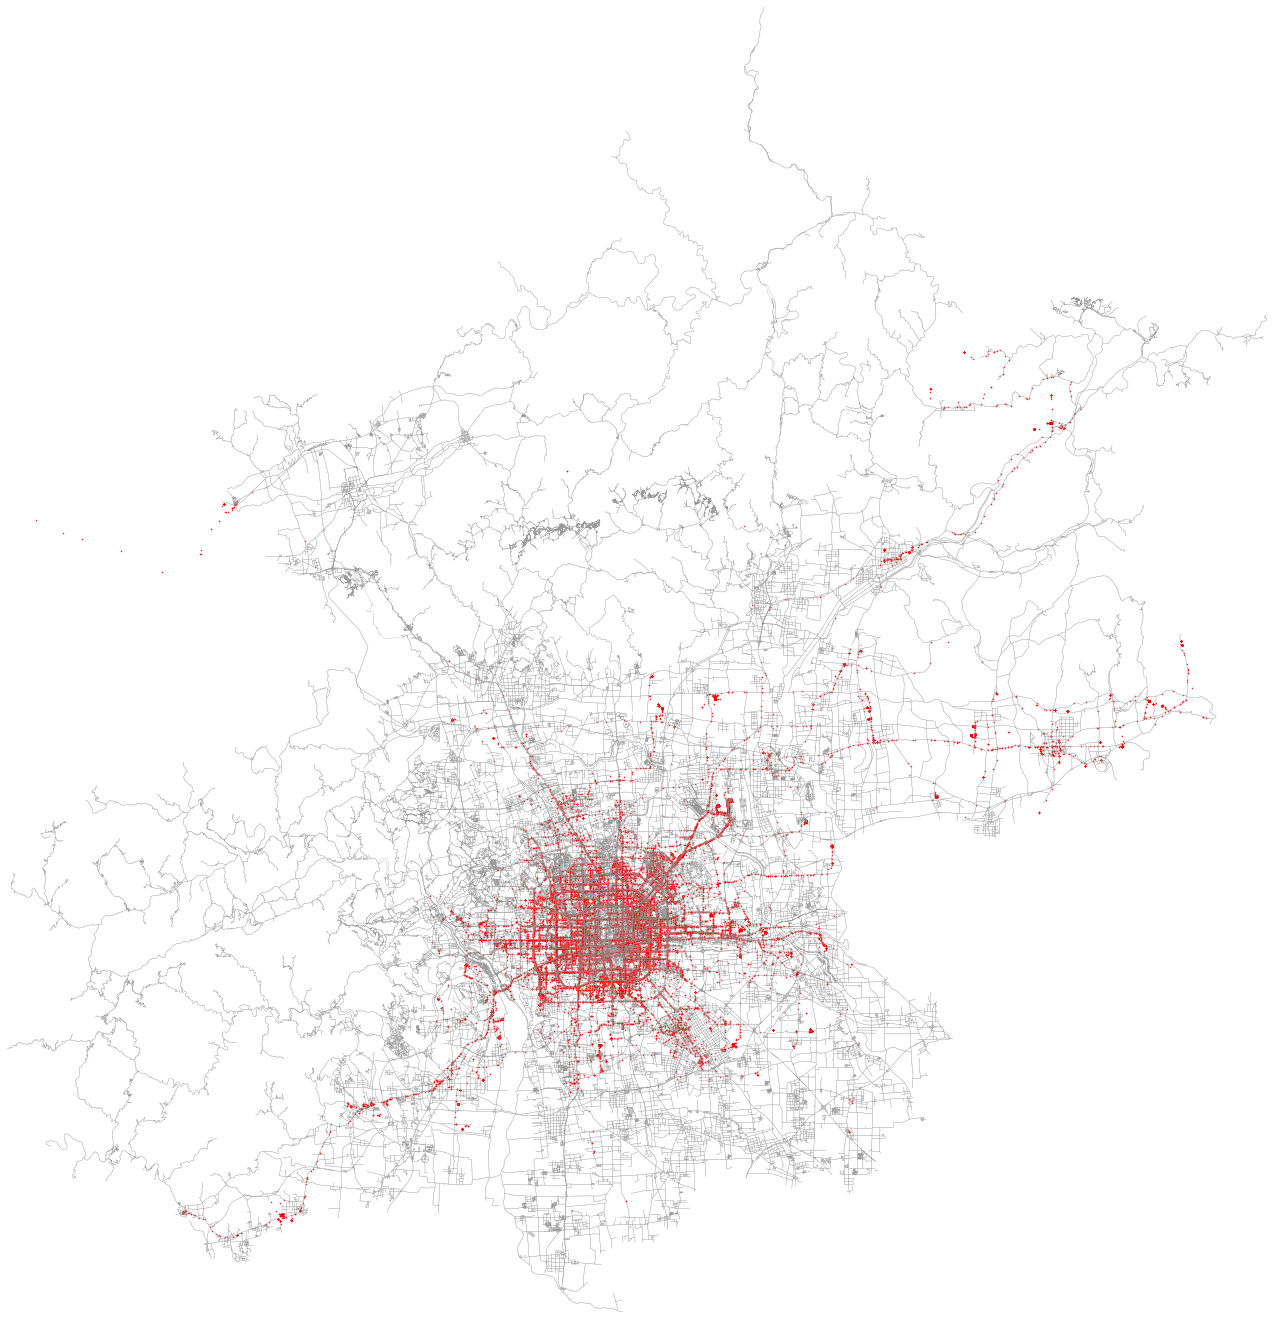

In [4]:
fig, ax = ox.plot_graph(streets_beijing, fig_height=24, node_size=0, edge_linewidth=0.25, margin=0.0,
                        show=False, close=False)
ax.scatter(real['longitude'], real['latitude'], c='#ff0000', s=0.25, alpha=1.0)

plt.savefig('../../Images/question_overview_tdrive_real.png', dpi=100, bbox_inches='tight')

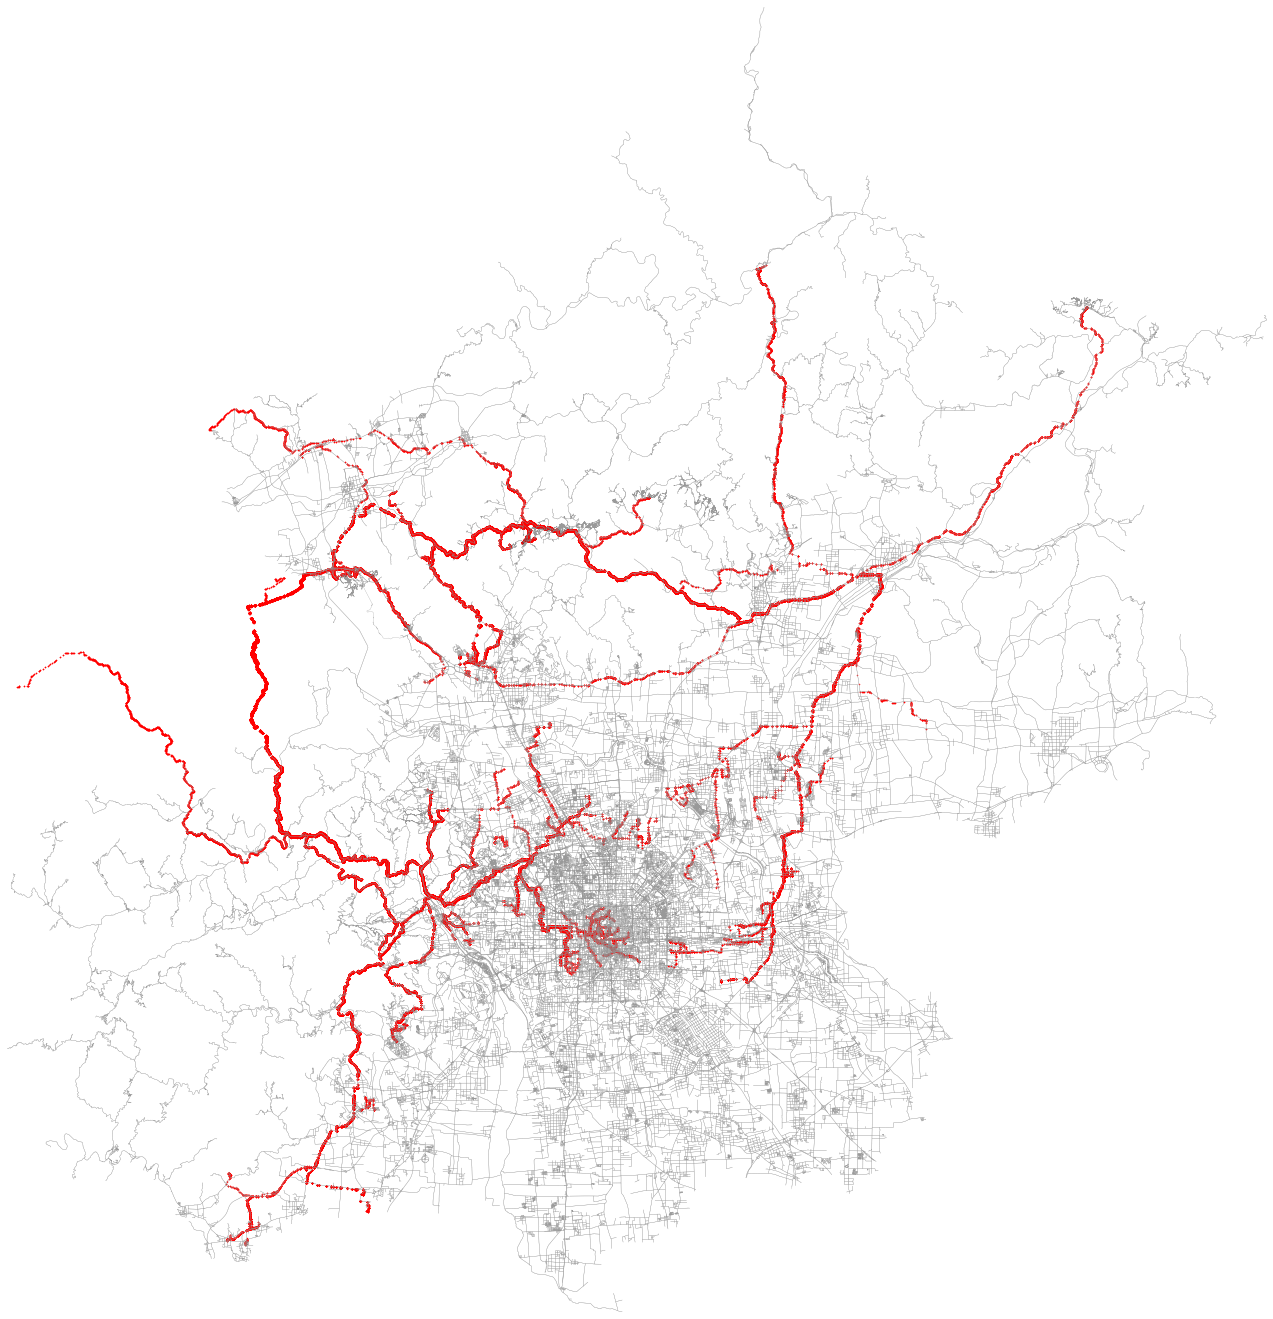

In [5]:
fig, ax = ox.plot_graph(streets_beijing, fig_height=24, node_size=0, edge_linewidth=0.25, margin=0.0,
                        show=False, close=False)
ax.scatter(fake['longitude'], fake['latitude'], c='#ff0000', s=0.25, alpha=1.0)

plt.savefig('../../Images/question_overview_tdrive_berlinmod.png', dpi=100, bbox_inches='tight')

## Histogram of # records in every hour

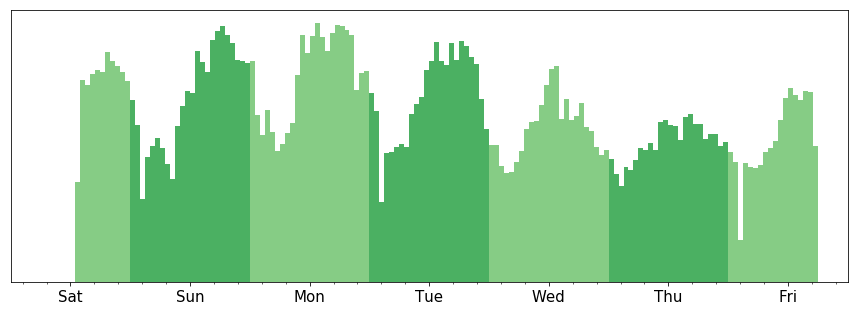

In [6]:
plt.figure(figsize=(15, 5))
_, _, patches = plt.hist(real.index.levels[1], bins=168,
                         range=(pd.Timestamp('2008-02-02 00:00:00'), pd.Timestamp('2008-02-08 23:59:59')))
cm = plt.cm.Greens
colours = ([0.45]*24 + [0.6]*24)*7
for c, p in zip(colours, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.xlim(pd.Timestamp('2008-02-02 00:00:00'), pd.Timestamp('2008-02-08 23:59:59'))
plt.xticks([pd.Timestamp('2008-02-02 12:00:00'), pd.Timestamp('2008-02-03 12:00:00'),
           pd.Timestamp('2008-02-04 12:00:00'), pd.Timestamp('2008-02-05 12:00:00'),
           pd.Timestamp('2008-02-06 12:00:00'), pd.Timestamp('2008-02-07 12:00:00'),
           pd.Timestamp('2008-02-08 12:00:00')], 
           ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.yticks([])
plt.minorticks_on()
plt.tick_params(labelsize=15.0)

plt.savefig('../../Images/question_traffic_tdrive_real.pdf', dpi=20, bbox_inches='tight')

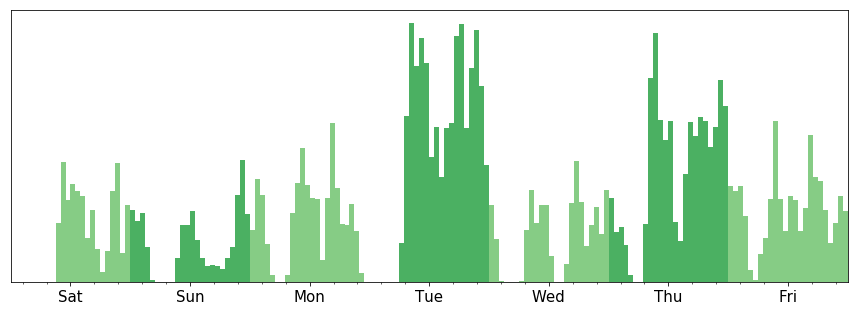

In [7]:
plt.figure(figsize=(15, 5))
_, _, patches = plt.hist(fake.index.levels[1], bins=168,
                         range=(pd.Timestamp('2008-02-02 00:00:00'), pd.Timestamp('2008-02-08 23:59:59')))
cm = plt.cm.Greens
colours = ([0.45]*24 + [0.6]*24)*7
for c, p in zip(colours, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.xlim(pd.Timestamp('2008-02-02 00:00:00'), pd.Timestamp('2008-02-08 23:59:59'))
plt.xticks([pd.Timestamp('2008-02-02 12:00:00'), pd.Timestamp('2008-02-03 12:00:00'),
           pd.Timestamp('2008-02-04 12:00:00'), pd.Timestamp('2008-02-05 12:00:00'),
           pd.Timestamp('2008-02-06 12:00:00'), pd.Timestamp('2008-02-07 12:00:00'),
           pd.Timestamp('2008-02-08 12:00:00')], 
           ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.yticks([])
plt.minorticks_on()
plt.tick_params(labelsize=15.0)

plt.savefig('../../Images/question_traffic_tdrive_berlinmod.pdf', dpi=20, bbox_inches='tight')

## Distribution of speeds

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles * 1.6

def speed_distribution(ds):
    tmp = ds.reset_index()
    delta_t = tmp.groupby('user')['time'].diff().dt.total_seconds()
    delta_t = delta_t / 3600.0
    prvs_poss = tmp.groupby('user')[['latitude', 'longitude']].shift(1)
    delta_w = haversine(prvs_poss['latitude'], prvs_poss['longitude'], tmp['latitude'], tmp['longitude'])
    speeds = delta_w / delta_t
    
    print(speeds.describe())
    
    plt.figure(figsize=(15, 5))
    plt.hist(speeds, bins=range(0, 150))
    plt.xlim(0, 150)
    plt.yticks([])
    plt.minorticks_on()
    plt.tick_params(labelsize=15.0)

/Users/jankaiser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arcsin
  import sys


count    5.705200e+04
mean              inf
std               NaN
min      0.000000e+00
25%      2.644532e-02
50%      2.067302e+00
75%      1.763089e+01
max               inf
dtype: float64


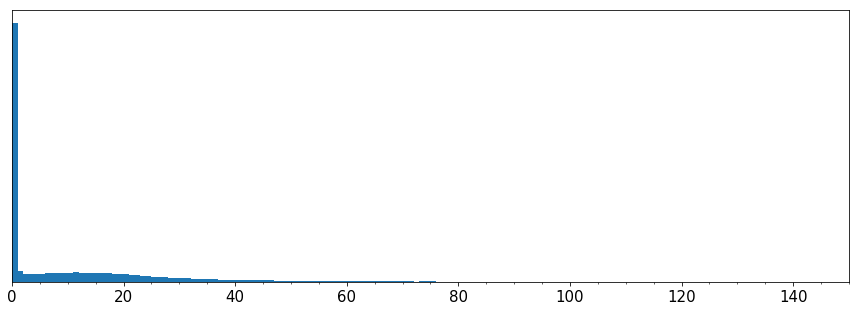

In [9]:
speed_distribution(real)
plt.savefig('../../Images/question_speeds_tdrive_real.pdf', dpi=20, bbox_inches='tight')

/Users/jankaiser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arcsin
  import sys


count    374438.000000
mean         54.686133
std        1108.950253
min           0.000000
25%           0.000000
50%          25.644648
75%          39.275070
max      270999.339375
dtype: float64


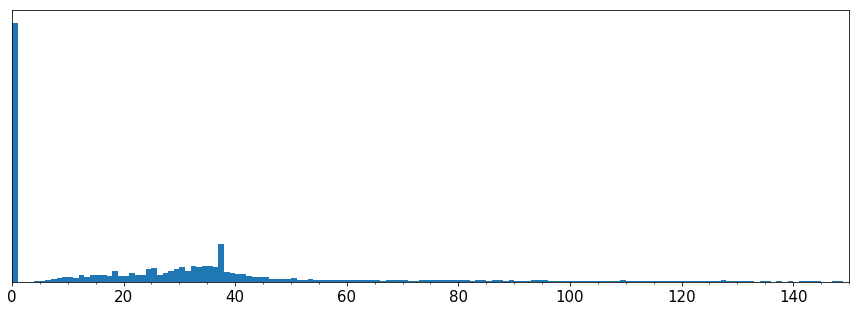

In [10]:
speed_distribution(fake)
plt.savefig('../../Images/question_speeds_tdrive_berlinmod.pdf', dpi=20, bbox_inches='tight')

## One user's data

In [11]:
real.index.levels[0]

Int64Index([  102,   229,   322,   412,   550,   609,   623,   674,   859,
             1023,  1088,  1208,  1218,  1283,  1326,  1606,  1764,  2257,
             2340,  3030,  3269,  3308,  3545,  3861,  4159,  4171,  4243,
             5047,  5140,  5891,  5914,  6585,  6598,  6749,  7159,  7365,
             7443,  8266,  8637,  8744,  8864,  8882,  8930,  9037,  9238,
             9363,  9786,  9988, 10123, 10334],
           dtype='int64', name='user')

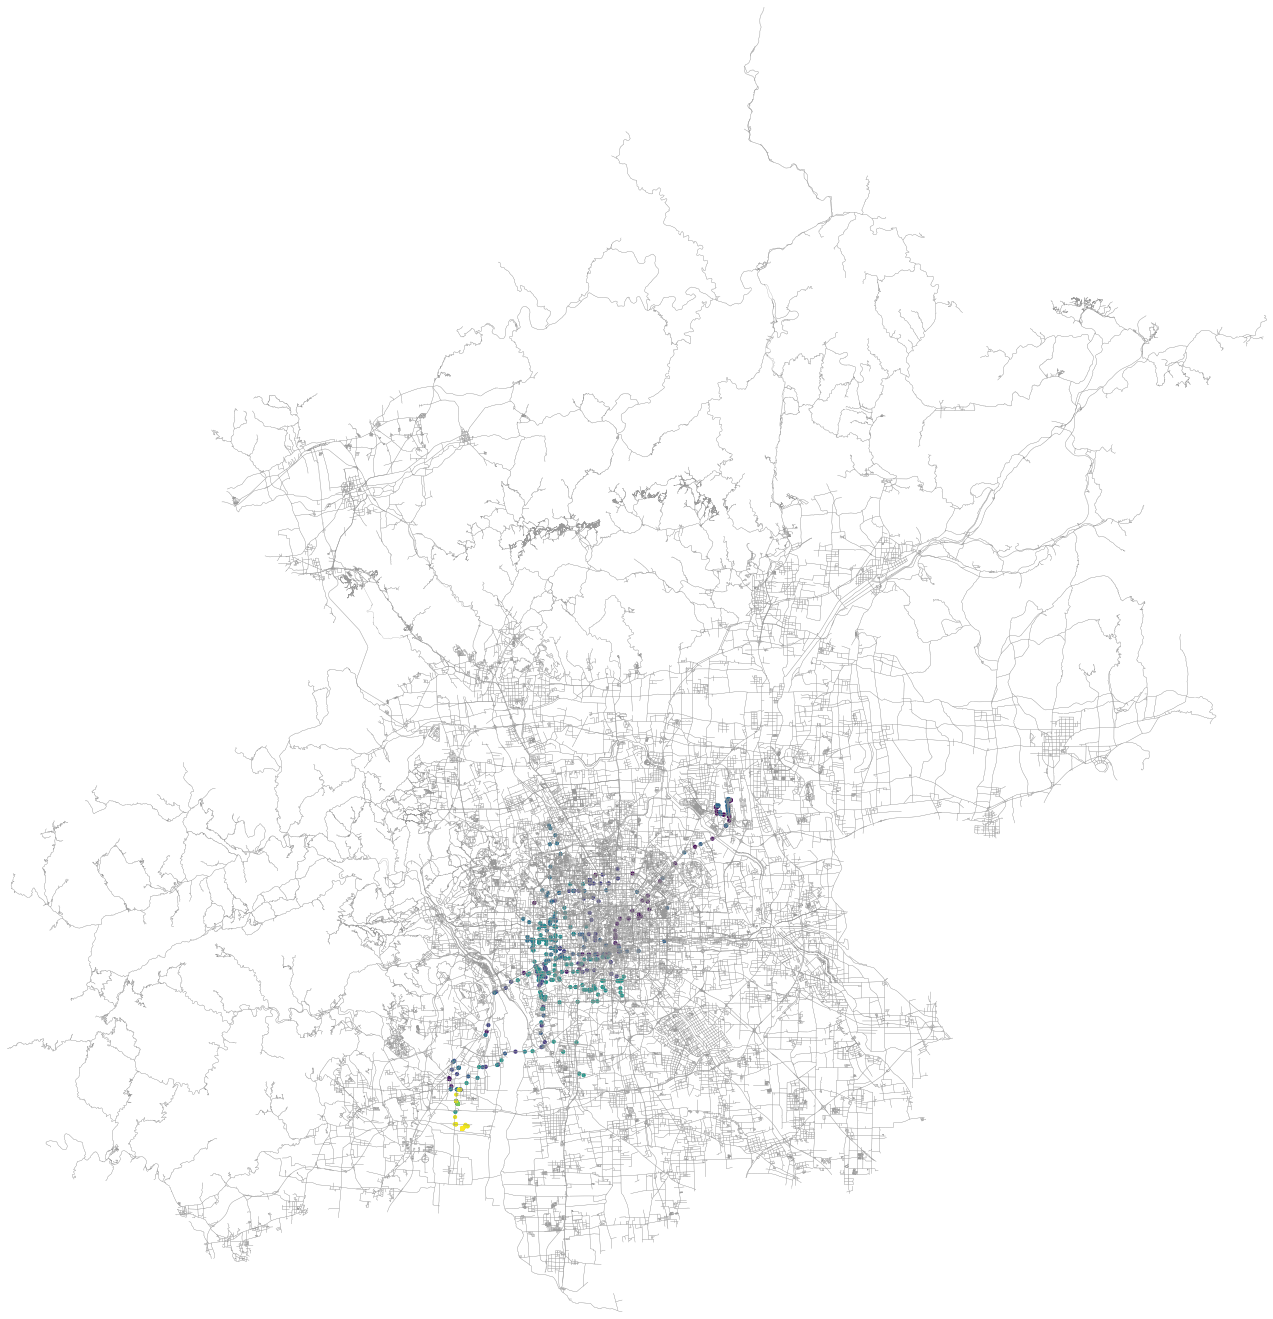

In [11]:
user = 623
fig, ax = ox.plot_graph(streets_beijing, fig_height=24, node_size=0, edge_linewidth=0.25, margin=0.0,
                        show=False, close=False)
ax.scatter(real.loc[user]['longitude'], real.loc[user]['latitude'], c=real.loc[user].index, s=10.0, alpha=1.0)

plt.savefig('../../Images/question_single_tdrive_real.png', dpi=100, bbox_inches='tight')

In [11]:
fake.index.levels[0]

Int64Index([ 1,  2,  4,  5,  7,  8,  9, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24,
            26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44,
            45, 46, 48, 49, 50],
           dtype='int64', name='user')

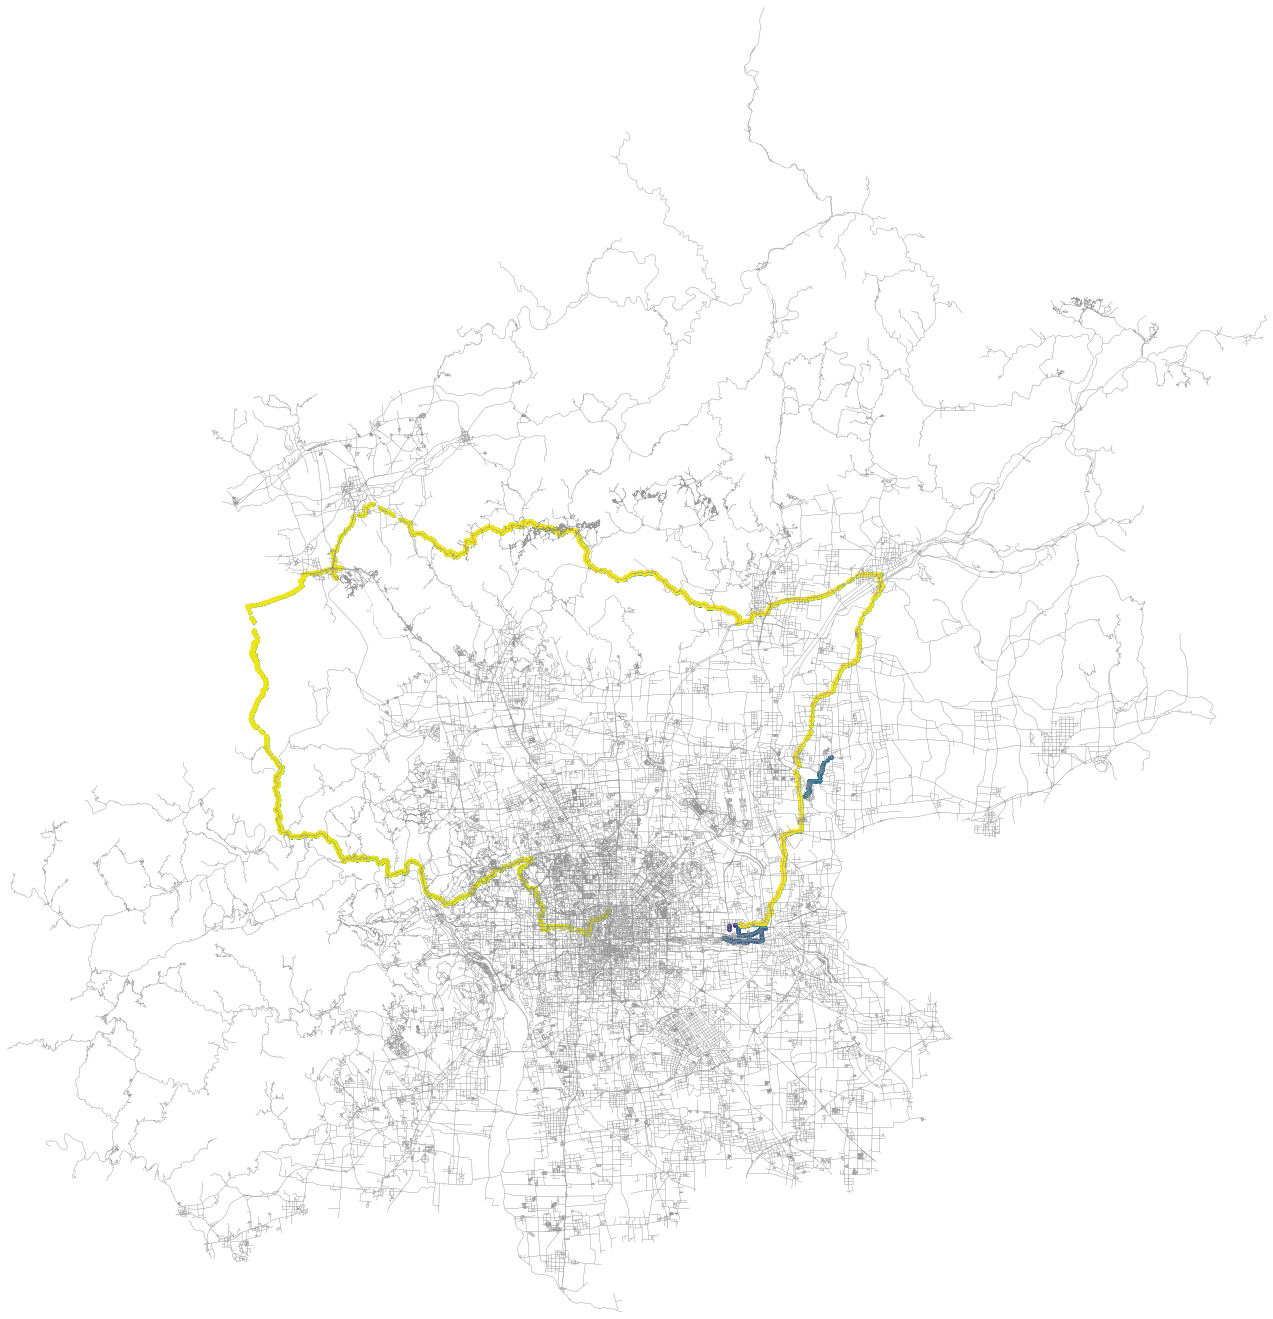

In [12]:
user = 36
fig, ax = ox.plot_graph(streets_beijing, fig_height=24, node_size=0, edge_linewidth=0.25, margin=0.0,
                        show=False, close=False)
ax.scatter(fake.loc[user]['longitude'], fake.loc[user]['latitude'], c=fake.loc[user].index, s=10.0, alpha=1.0)

plt.savefig('../../Images/question_single_tdrive_berlinmod.png', dpi=100, bbox_inches='tight')